<a href="https://colab.research.google.com/github/OlimpiaGarcia/Book_algorithm/blob/main/Model_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar librerias

In [1]:
# imports generales
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno  as msno
import ast
import xgboost as xgb

# imports de modelo
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# imports de metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# imports de red neuronal
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

# conexión con google
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Leer csv de drive

In [2]:
ruta_dir = "/content/drive/MyDrive/Colab Notebooks/octavo/benji/reto /data/train"

# Creacion de DF

## leer CSV y pasarlo a DF

In [3]:
data = pd.read_csv(os.path.join(ruta_dir, 'train_scaled.csv'), encoding='utf-8')

In [4]:
text = pd.read_csv(os.path.join(ruta_dir, 'train_text.csv'), encoding='utf-8')

In [5]:
data.sample(10)

,id,num_pages,num_ratings,num_reviews,average_rating,rating_5,rating_4,rating_3,rating_2,rating_1,...,محمد عبد الرحمن العريفي,محمد قطب,مصطفى صادق الرافعي,مصطفى محمود,نور عبدالمجيد,هبة سيد عبد العاطي,يحيى بن شرف النووي,يوسف زيدان,ปรีดี พนมยงค์,နုနုရည်အင်းဝ
11001,11001,0.035598,-0.268667,-0.324333,-2.714109,-0.229991,-0.290695,-0.300381,-0.259743,-0.184329,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
8569,8569,1.250074,-0.267464,-0.325028,1.441046,-0.227906,-0.289909,-0.300568,-0.260808,-0.184436,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
4304,4304,-0.027697,-0.000559,-0.081684,1.319728,0.074259,-0.007295,-0.144137,-0.194493,-0.134737,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
4449,4449,-0.332305,-0.264177,-0.323384,0.258192,-0.225331,-0.286393,-0.297818,-0.254949,-0.177260,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
2341,2341,-0.640869,-0.197339,-0.285198,1.137750,-0.148964,-0.225956,-0.241650,-0.230447,-0.170298,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
3587,3587,-0.514279,-0.219537,-0.270973,-0.803344,-0.202312,-0.239067,-0.210145,-0.173853,-0.137201,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
11288,11288,-0.205715,0.052927,0.406901,0.197533,0.008788,0.117313,0.088494,-0.002207,-0.036410,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
8257,8257,-0.375821,0.132329,0.220457,0.167203,0.095333,0.151321,0.182761,0.123765,0.135181,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
2581,2581,-1.408323,-0.258431,-0.320856,0.925443,-0.220214,-0.275805,-0.297963,-0.252951,-0.182187,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
5320,5320,-0.901962,-0.268698,-0.325218,1.653354,-0.229565,-0.290633,-0.301374,-0.261407,-0.185400,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778


In [6]:
text.sample(10)

,id,cover_image_uri,book_title,book_details
5375,5375,https://dryofg8nmyqjw.cloudfront.net/images/no...,Herodotus 7-9,"English, Greek"
503,503,https://images-na.ssl-images-amazon.com/images...,Persuader,Jack Reacher. The ultimate loner. An elite ex-...
1705,1705,https://images-na.ssl-images-amazon.com/images...,Marching Powder,"Rusty Young, a twenty-something Australian law..."
7919,7919,https://images-na.ssl-images-amazon.com/images...,As You Like It,Readers and audiences have long greeted As You...
10734,10734,https://images-na.ssl-images-amazon.com/images...,The Broken Wings,A tender tale set in Beirut tells of first lov...
3909,3909,https://images-na.ssl-images-amazon.com/images...,Fourth Wing,Twenty-year-old Violet Sorrengail was supposed...
1335,1335,https://images-na.ssl-images-amazon.com/images...,Dragonfly in Amber,An alternate cover edition can be found here.F...
1982,1982,https://images-na.ssl-images-amazon.com/images...,The Worst Witch,Mildred Hubble is the worst witch at Miss Cack...
7003,7003,https://images-na.ssl-images-amazon.com/images...,Collected Stories,Collected here are twenty-six of Gabriel Garci...
5861,5861,https://images-na.ssl-images-amazon.com/images...,The Slime Beast,Professor Lowson is searching the Wash for Kin...


# Hacer que ambos DF usen la columna ID como indice

In [7]:
data.set_index('id', inplace=True)
text.set_index('id', inplace=True)

# Implementar KNN

Recomienda libros similares a partir de un ID usando KNN.

Parámetros:
  - id_libro: int, ID del libro de referencia.
  - df_numerico: DataFrame con características numéricas escaladas (indexado por 'id').
  - df_text: DataFrame con información textual (indexado por 'id').
  - n_recomendaciones: número de recomendaciones a devolver (sin contar el libro mismo).

Retorna:
  - DataFrame con títulos y descripciones de los libros recomendados.


In [8]:
def recomendar_librosKNN(id_libro, df_numerico, df_text, n_recomendaciones=10):

  #  KNN
  knn = NearestNeighbors(
      metric='cosine',
      algorithm='auto')
  knn.fit(df_numerico)

  # Vector del libro base
  vector_libro = df_numerico.loc[[id_libro]]

  # Obtener vecinos (sumamos 1 porque el primer resultado será el libro mismo)
  distancias, indices = knn.kneighbors(vector_libro, n_neighbors=n_recomendaciones + 1)

  # Ignorar el primer resultado (es el propio libro)
  indices_recomendados = indices[0][1:]
  ids_recomendados = df_numerico.iloc[indices_recomendados].index

  # Combinar con texto y devolver
  recomendaciones = df_text.loc[ids_recomendados][['book_title', 'book_details']]
  return recomendaciones

## Correr KNN

In [9]:
# Solicitar cuantos libros parecidos quieres:
#recomendaciones = int(input("¿Cuántos libros parecidos quieres?"))

# el libro es harry Potter 5
recomendar_librosKNN(10611, data, text)# Mandar n numero de lbors)

,book_title,book_details
id,,
12399,Harry Potter and the Goblet of Fire,It is the summer holidays and soon Harry Potte...
12693,Harry Potter and the Deathly Hallows,"Harry has been burdened with a dark, dangerous..."
7595,Harry Potter and the Sorcerer's Stone,Harry Potter has no idea how famous he is. Tha...
9483,The Tales of Beedle the Bard,"""The Tales of Beedle the Bard"" contains five r..."
10061,Harry Potter and the Cursed Child. Parts One a...,Based on an original new story by J.K. Rowling...
7671,Harry Potter and the Cursed Child: Parts One a...,"The eighth story, nineteen years later...It wa..."
8666,The Harry Potter Collection 1-4,"The exciting tales of Harry Potter, the young ..."
11682,"Harry Potter Boxed Set, Books 1-5",Box Set containing Harry Potter and the Sorcer...
7145,Harry Potter Schoolbooks: Quidditch Through th...,SHS0545007984 Features: -Subjects: Literacy Ce...


# Target:
Saber  que tan buenos son los libros recomendados

### para esto necesitamos la columna "average_rating" sin escalar

In [10]:
rating = pd.read_csv(os.path.join(ruta_dir, 'train_data.csv'), encoding='utf-8')

In [11]:
rating['average_rating']

,average_rating
0,4.24
1,4.26
2,4.00
3,4.03
4,3.84
...,...
12975,3.32
12976,3.58
12977,4.21
12978,4.46


In [12]:
data['average_rating_original'] = rating['average_rating'].values
data.drop('average_rating', axis=1, inplace=True)

In [13]:
data.sample(5).T

id,9125,8213,4170,10337,7114
num_pages,0.047466,0.680417,-1.297557,-1.155143,-0.079125
num_ratings,1.171027,-0.128140,-0.268880,-0.193298,-0.207087
num_reviews,3.357506,-0.163621,-0.325155,-0.201870,-0.179932
rating_5,0.638159,-0.106034,-0.230035,-0.198415,-0.165244
rating_4,1.597571,-0.128480,-0.290726,-0.210322,-0.222254
...,...,...,...,...,...
يحيى بن شرف النووي,-0.008778,-0.008778,-0.008778,-0.008778,-0.008778
يوسف زيدان,0.000000,0.000000,0.000000,0.000000,0.000000
ปรีดี พนมยงค์,0.000000,0.000000,0.000000,0.000000,0.000000
နုနုရည်အင်းဝ,-0.008778,-0.008778,-0.008778,-0.008778,-0.008778


## Creamos la clase objetivo a predecir: Rating_class

Asignamos los valores de los ratings a una descripción y creamos la clase:

| Rango rating | Clase | Descripción |
| ------------ | ----- | ----------- |
| <= 2.5       | 0     | Malo        |
| >2.5 y <=2.9 | 1     | Regular     |
| >3 y <=4.0   | 2     | Bueno       |
| >4.0         | 3     | Excelente   |


Creamos la columna rating class y la llenamos con las clases de las distintas categorias usnado cut para seleccionar los intrvalos, bins son los rangos y labels son las clases que van a quedar en la columna

In [14]:
data['rating_class'] = pd.cut(
  data['average_rating_original'],
  bins=[-float('inf'), 2.5, 3.5, 4.0, float('inf')],
  labels=[0, 1, 2, 3]
)

In [15]:
data['rating_class']

,rating_class
id,
0,3
1,3
2,2
3,3
4,2
...,...
12975,1
12976,2
12977,3


In [16]:
# convertir la columna de category a int por que los modelos solo trabajan con numeros
data['rating_class'] = data['rating_class'].astype(int)

Checar como queedaron las clases:

In [17]:
print("Distribución de clases en rating_class:")
print(data['rating_class'].value_counts().sort_index())

Distribución de clases en rating_class:
rating_class
0      33
1     669
2    5348
3    6930
Name: count, dtype: int64


# Separar data en train y test:

uno sera nuestros datos de entrenamiento y el test en el de evaluación

In [18]:
# checmos cuantos datos tenemos
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12980 entries, 0 to 12979
Columns: 8353 entries, num_pages to rating_class
dtypes: float64(8352), int64(1)
memory usage: 827.8 MB


Creamos una x donde dropeamos el average rating y el rating class ya que ese lo vamos a usar como la columna a predecir

In [19]:
# Separar X (features) e y (target)
X = data.drop(columns=['average_rating_original', 'rating_class'])
y = data['rating_class']

# Dividir en entrenamiento y prueba (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10384 entries, 9022 to 10694
Columns: 8351 entries, num_pages to နုနုရည်အင်းဝ
dtypes: float64(8351)
memory usage: 661.7 MB


Creamos una x alternativa donde dropeamos tambien las columnas de rating para ver como afectan al modelo

In [21]:
X1 = data.drop(columns= ['average_rating_original', 'rating_class','rating_5', 'rating_4', 'rating_3', 'rating_2', 'rating_1'])
y1 = data['rating_class']  # Target:

# Dividir en entrenamiento y prueba (80% / 20%)
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.2, random_state=42, stratify=y
)

# Funcion que evalua el modelo

Recibe:

- y_test: Valores reales del conjunto de prueba.
- y_pred: Predicciones generadas por el modelo.

Retorna:

- lista de  [accuracy, f1_score, MAE, matriz de confusión]

In [22]:
def evaluar_modelo(y_test, y_pred):
  results = []
  acc = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred, average='weighted')
  mae = mean_absolute_error(y_test, y_pred)
  cm = confusion_matrix(y_test, y_pred)

  print(f"Accuracy: {acc}")
  print(f"F1 Score: {f1}")
  print(f"MAE: {mae}")
  print("Confusion Matrix:")
  print(cm)

  results.append(acc)
  results.append(f1)
  results.append(mae)
  results.append(cm)

  return results

# Decision tree

## Armar el modelo

Recibe:

- X_train: Conjunto de características para entrenamiento.

- X_test: Conjunto de características para prueba

- y_train: Clase target a producir

- y_test: Clase target para comprobar

- max_depth: Profundidad máxima del árbol de decisión

Retorna
- modelo decision tree

In [23]:
def entrenar_decision_tree(X_train, X_test, y_train, y_test, max_depth = 10):
  # Crear el modelo
  model_dtc = DecisionTreeClassifier(
    criterion= "entropy",     # Usa entropy como en el paper para dividir nodos
    random_state= 42,          # Asegura reproducibilidad del árbol
    max_depth= max_depth,             # Limita la profundidad del árbol
    class_weight= "balanced"
)

  # Entrenar
  model_dtc.fit(X_train, y_train)

  return model_dtc

## Correr el modelo 1

In [24]:
# entrenar arbol 1
modelo_arbol = entrenar_decision_tree(X_train, X_test, y_train, y_test)

In [25]:
# predecir arbol 1
y_pred_dt = modelo_arbol.predict(X_test)

## correr modelo 2

In [26]:
# entrenar arbol 2
modelo_arbol2= entrenar_decision_tree(X1_train, X1_test, y1_train, y1_test)


In [27]:
# predecir arbol 2
y_pred2_dt2 = modelo_arbol2.predict(X1_test)

## Evaluacion

In [28]:
# evaluar arbol 1
decision_tree1 = evaluar_modelo(y_test, y_pred_dt)

Accuracy: 0.9106317411402157
F1 Score: 0.9106488940097847
MAE: 0.08975346687211094
Confusion Matrix:
[[   5    1    0    0]
 [   1  110   23    0]
 [   0   27  949   94]
 [   0    1   85 1300]]


In [29]:
# evaluar arbol 2
decision_tree2 = evaluar_modelo(y1_test, y_pred2_dt2)

Accuracy: 0.513482280431433
F1 Score: 0.53840616977267
MAE: 0.5689522342064715
Confusion Matrix:
[[  3   2   1   0]
 [  0  74  46  14]
 [  2 234 522 312]
 [  5 187 460 734]]


# meter al df las predicciones:

In [30]:
y_pred_dt = pd.DataFrame(y_pred_dt, columns=['y_pred_dt'])
y_pred2_dt2 = pd.DataFrame(y_pred2_dt2, columns=['y_pred2_dt2'])

# Knn Classifier

## Crear el modelo:
 Parámetros:
  - X_train: DataFrame de entrenamiento (features)
  - y_train: Series de clases (target)
  - n_neighbors: número de vecinos (default=10)

Retorna:
  - modelo_knn entrenado

In [31]:
def entrenar_knn(X_train, y_train, n_neighbors=10):
  model_knn = KNeighborsClassifier(
      n_neighbors=n_neighbors, # Que tantos vecinos
      p = 2, # usa distancia euclideana
      )
  model_knn.fit(X_train, y_train)
  return model_knn

## correr el modelo 1



In [32]:
# # entrenar
modelo_knn = entrenar_knn(X_train, y_train, n_neighbors=5)

# # Predecir
y_pred_knn1 = modelo_knn.predict(X_test)

## correr modelo 2

In [33]:
# # entrenar
modelo_knn2 = entrenar_knn(X1_train, y1_train, n_neighbors=5)

# # predecir
y_pred2_knn2 = modelo_knn2.predict(X1_test)

In [34]:
y_pred_knn1 = pd.DataFrame(y_pred_knn1, columns=['y_pred_knn1'])
y_pred2_knn2 = pd.DataFrame(y_pred2_knn2, columns=['y_pred2_knn2'])

## Evaluación

In [35]:
# Evaluar modelo 1
knn1 = evaluar_modelo(y_test, y_pred_knn1)

Accuracy: 0.5546995377503852
F1 Score: 0.535668378717213
MAE: 0.450693374422188
Confusion Matrix:
[[  1   0   5   0]
 [  0   6 120   8]
 [  0   6 845 219]
 [  0   1 797 588]]


In [36]:
# evaluar modelo 2
knn2 = evaluar_modelo(y1_test, y_pred2_knn2)

Accuracy: 0.5901386748844376
F1 Score: 0.579536641051604
MAE: 0.41910631741140214
Confusion Matrix:
[[  1   0   5   0]
 [  0   6 110  18]
 [  0   6 757 307]
 [  0   1 617 768]]


# Red Neuronal?

In [37]:
# crear modelo
model1 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# crear modelo
model2 = Sequential([
    Dense(64, activation='relu', input_shape=(X1_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compilar
model1.compile(optimizer='adam', loss='mean_squared_error')

model2.compile(optimizer='adam', loss='mean_squared_error')

# guardar mejor modelo
checkpoint = ModelCheckpoint("mejor_modelo.keras", save_best_only=True, monitor="val_loss")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
# #modelo 1
# model1.fit(X_train,
#           y_train,
#           epochs=150,
#           validation_split=0.2,
#           batch_size=32,
#           callbacks=checkpoint)

In [39]:
# # modelo 2
# model2.fit(X1_train,
#           y1_train,
#           epochs=150,
#           validation_split=0.2,
#           batch_size=32,
#           callbacks=checkpoint)

In [40]:
# guardar el modelo:
model1.save("mejor_modelo1.keras")
model2.save("mejor_modelo2.keras")

In [41]:
# cargar el modelo nuevamente de ser necesario:
modelo_cargado = load_model("mejor_modelo1.keras")
modelo_cargado2 = load_model("mejor_modelo2.keras")


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 14 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [42]:
# predecir modelo 1
y_pred_nn1 = model1.predict(X_test)

82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [43]:
# predecir modelo 2
y_pred2_nn2 = model2.predict(X1_test)

82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


# evaluar regresion:

In [44]:
def evaluar_regresion(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"R²: {r2}")

    return [mae, mse, r2]

In [45]:
# evaluar nn
nn1 = evaluar_regresion(y_test, y_pred_nn1)

MAE: 3.5156288146972656
MSE: 13.271340370178223
R²: -35.200740814208984


In [46]:
# evaluar nn2
nn2 = evaluar_regresion(y1_test, y_pred2_nn2)

MAE: 2.696023941040039
MSE: 8.03238296508789
R²: -20.91023826599121


# Comparación entre todos los modelos:D

- Decision Tree 1
- Decision Tree 2

- Knn 1
- Knn 2



## DF de todos los resultados

In [47]:
model_names = [
  "Decision Tree 1", "Decision Tree 2",
  "KNN 1", "KNN 2",
]

model_results_train = [
  decision_tree1, decision_tree2,
  knn1, knn2,
]

In [48]:
def comparar_modelos(model_results, model_names):

  acc_list = [res[0] for res in model_results]
  f1_list = [res[1] for res in model_results]
  mae_list = [res[2] for res in model_results]

  df_results = pd.DataFrame({
    "Modelo": model_names,
    "Accuracy": acc_list,
    "F1-Score": f1_list,
    "MAE": mae_list
  })

  return df_results

In [49]:
df_results = comparar_modelos(model_results_train, model_names)
df_results

,Modelo,Accuracy,F1-Score,MAE
0,Decision Tree 1,0.910632,0.910649,0.089753
1,Decision Tree 2,0.513482,0.538406,0.568952
2,KNN 1,0.554700,0.535668,0.450693
3,KNN 2,0.590139,0.579537,0.419106


## Matriz de confusión

In [50]:
# Lista de confussion matrix  de los resultados
cm_list = [
  decision_tree1[3], decision_tree2[3],
  knn1[3], knn2[3]

]

In [51]:
# Función para graficar todas las matrices
def plot_confusion_matrices(cm_list, model_names, class_labels=None):
  fig, axes = plt.subplots(2, 2, figsize=(22, 10))  # 2 filas x 2 columnas
  axes = axes.flatten()

  for i, (cm, name) in enumerate(zip(cm_list, model_names)):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=axes[i], cmap='Blues', colorbar=False)
    axes[i].set_title(name)
    axes[i].set_xlabel("Predicción")
    axes[i].set_ylabel("Real")

  plt.tight_layout()
  plt.show()

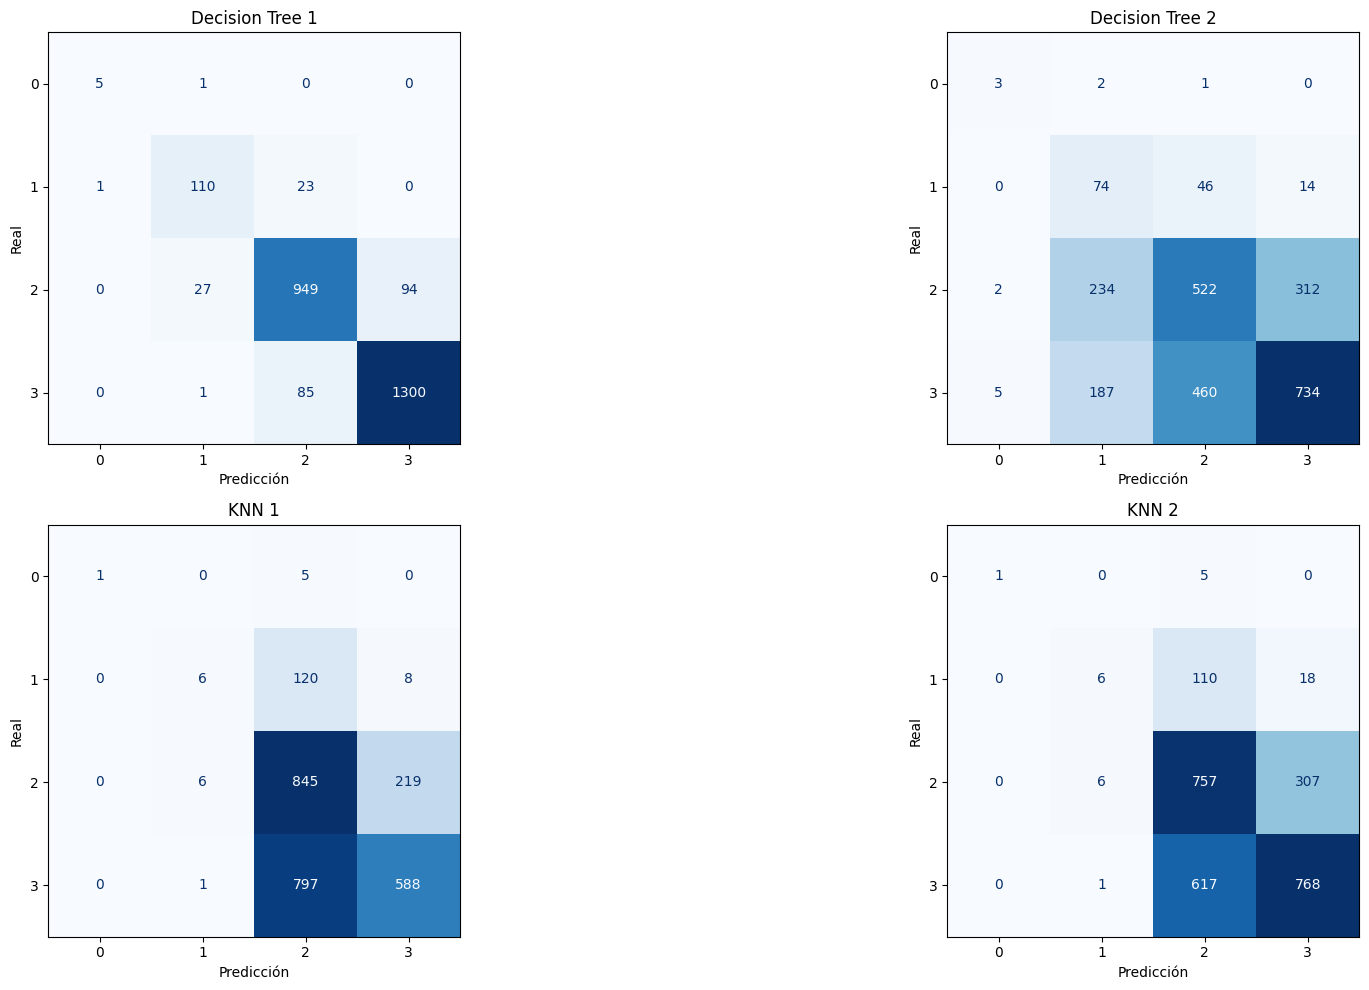

In [52]:
# Llamar la función para mostrar las matrices
plot_confusion_matrices(cm_list, model_names)

# Añadimos el set de Test

In [53]:
ruta_dir_test = "/content/drive/MyDrive/Colab Notebooks/octavo/benji/reto /data/test"

In [54]:
data_test = pd.read_csv(os.path.join(ruta_dir_test, 'test_scaled.csv'), encoding='utf-8')

In [55]:
text_test = pd.read_csv(os.path.join(ruta_dir_test, 'test_text.csv'), encoding='utf-8')

In [56]:
data_test.sample(10)

,id,num_pages,num_ratings,num_reviews,average_rating,rating_5,rating_4,rating_3,rating_2,rating_1,...,محمد عبد الرحمن العريفي,محمد قطب,مصطفى صادق الرافعي,مصطفى محمود,نور عبدالمجيد,هبة سيد عبد العاطي,يحيى بن شرف النووي,يوسف زيدان,ปรีดี พนมยงค์,နုနုရည်အင်းဝ
3191,3191,-1.408323,-0.269007,-0.325977,-0.682026,-0.230004,-0.290964,-0.301374,-0.261207,-0.185293,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
3215,3215,0.063289,0.145867,-0.072706,0.895113,0.151295,0.248000,0.028047,-0.142560,-0.123383,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
347,347,0.233395,0.289731,0.173293,-0.136093,0.135809,0.401302,0.520988,0.311524,0.108296,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
2876,2876,-0.585486,-0.267279,-0.325850,0.743465,-0.228701,-0.288048,-0.300195,-0.261207,-0.185400,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
2221,2221,-0.241319,0.424267,-0.044572,0.015555,0.239226,0.575035,0.738569,0.268113,0.037925,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
1291,1291,-0.553838,0.541995,0.777070,0.318851,0.425533,0.698112,0.573538,0.397680,0.233937,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
2465,2465,-0.680429,-0.268072,-0.325408,0.379510,-0.229107,-0.290136,-0.300175,-0.260475,-0.184865,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
67,67,-0.229451,-0.043087,-0.062527,0.440169,-0.067027,0.045698,-0.074222,-0.164998,-0.144591,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
1385,1385,-0.526147,-0.231687,-0.272301,0.440169,-0.200628,-0.241652,-0.261723,-0.237904,-0.177581,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
1707,1707,0.933598,-0.239402,-0.301699,0.500829,-0.203546,-0.258382,-0.269538,-0.238969,-0.172654,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778


In [57]:
text_test.sample(10)

,id,cover_image_uri,book_title,book_details
1999,1999,https://images-na.ssl-images-amazon.com/images...,I'm Thinking of Ending Things,"Now a Netflix original movie, this deeply scar..."
1041,1041,https://images-na.ssl-images-amazon.com/images...,Wesley the Owl: The Remarkable Love Story of a...,When biologist Stacey O'Brien first met a four...
2089,2089,https://images-na.ssl-images-amazon.com/images...,Binding 13,"His first, last, and only true love has alway..."
2463,2463,https://images-na.ssl-images-amazon.com/images...,"'night, Mother","'night, Mother is a taut and fluid drama that ..."
2127,2127,https://images-na.ssl-images-amazon.com/images...,Worstward Ho,"Beckett's second last prose text, Worstward Ho..."
1851,1851,https://images-na.ssl-images-amazon.com/images...,Son of Rosemary,Rosemary's Baby chilled readers with its darkl...
469,469,https://images-na.ssl-images-amazon.com/images...,The Scarlet Letter,"Set in 17th-century Puritan Boston, Massachuse..."
3207,3207,https://images-na.ssl-images-amazon.com/images...,Journey to Ixtlan: The Lessons of Don Juan,"In Journey to Ixtlan, Carlos Castaneda introdu..."
2902,2902,https://images-na.ssl-images-amazon.com/images...,The Sea,The author of The Untouchable (“contemporary f...
1044,1044,https://images-na.ssl-images-amazon.com/images...,The Stone Diaries,The Stone Diaries is one ordinary woman's stor...


## Hacer que ambos DF usen la columna ID como indice

In [58]:
data_test.set_index('id', inplace=True)
text_test.set_index('id', inplace=True)

## Añadimos el data set de test sin esclaar para hacer el target

## Target:
Saber  que tan buenos son los libros recomendados

### para esto necesitamos la columna "average_rating" sin escalar

In [59]:
rating_test = pd.read_csv(os.path.join(ruta_dir_test, 'test_data.csv'), encoding='utf-8')

In [60]:
rating_test['average_rating']

,average_rating
0,3.73
1,3.96
2,3.98
3,3.66
4,3.87
...,...
3240,4.35
3241,4.03
3242,3.88
3243,4.53


In [61]:
data_test['average_rating_original'] = rating_test['average_rating'].values
data_test.drop('average_rating', axis=1, inplace=True)

In [62]:
data_test.sample(5).T

id,2916,669,2085,1262,4
num_pages,-0.680429,0.122629,0.462840,-1.099759,0.300646
num_ratings,-0.266058,-0.239351,-0.102156,-0.265736,-0.052937
num_reviews,-0.322246,-0.236200,-0.092116,-0.322246,0.117468
rating_5,-0.226615,-0.198657,-0.095399,-0.228904,-0.108545
rating_4,-0.287283,-0.259416,-0.093117,-0.287417,-0.009839
...,...,...,...,...,...
يحيى بن شرف النووي,-0.008778,-0.008778,-0.008778,-0.008778,-0.008778
يوسف زيدان,0.000000,0.000000,0.000000,0.000000,0.000000
ปรีดี พนมยงค์,0.000000,0.000000,0.000000,0.000000,0.000000
နုနုရည်အင်းဝ,-0.008778,-0.008778,-0.008778,-0.008778,-0.008778


## Creamos la clase objetivo a predecir: Rating_class

Asignamos los valores de los ratings a una descripción y creamos la clase:

| Rango rating | Clase | Descripción |
| ------------ | ----- | ----------- |
| <= 2.5       | 0     | Malo        |
| >2.5 y <=2.9 | 1     | Regular     |
| >3 y <=4.0   | 2     | Bueno       |
| >4.0         | 3     | Excelente   |


Creamos la columna rating class y la llenamos con las clases de las distintas categorias usnado cut para seleccionar los intrvalos, bins son los rangos y labels son las clases que van a quedar en la columna

In [63]:
data_test['rating_class'] = pd.cut(
  data_test['average_rating_original'],
  bins=[-float('inf'), 2.5, 3.5, 4.0, float('inf')],
  labels=[0, 1, 2, 3]
)

In [64]:
data_test['rating_class']

,rating_class
id,
0,2
1,2
2,2
3,2
4,2
...,...
3240,3
3241,3
3242,2


In [65]:
# convertir la columna de category a int por que los modelos solo trabajan con numeros
data_test['rating_class'] = data_test['rating_class'].astype(int)

Checar como queedaron las clases:

In [66]:
print("Distribución de clases en rating_class:")
print(data_test['rating_class'].value_counts().sort_index())

Distribución de clases en rating_class:
rating_class
0      19
1     179
2    1347
3    1700
Name: count, dtype: int64


# Separar los datos de test

Creamos una x donde dropeamos el average rating y el rating class ya que ese lo vamos a usar como la columna a predecir

In [67]:
# Separar X (features) e y (target)
X_T = data_test.drop(columns=['average_rating_original', 'rating_class'])
y_T = data_test['rating_class']  # Target: clases 0–5


Creamos una x alternativa donde dropeamos tambien las columnas de rating para ver como afectan al modelo

In [68]:
X1_T = data.drop(columns= ['average_rating_original', 'rating_class','rating_5', 'rating_4', 'rating_3', 'rating_2', 'rating_1'])
y1_T = data['rating_class']  # Target: clases 0–5


# Comprobar el modelo con los datos de test

### Decision Tree

#### Correr el modelo

In [69]:
# Modelo 1
y_pred1 = modelo_arbol.predict(X_T)

# Modelo 2
y_pred2 = modelo_arbol2.predict(X1_T)

#### Evaluar

In [70]:
# MODELO 1
decision_tree1_test = evaluar_modelo(y_T, y_pred1)

Accuracy: 0.8933744221879815
F1 Score: 0.893776956383286
MAE: 0.10785824345146379
Confusion Matrix:
[[  11    6    1    1]
 [   4  140   35    0]
 [   0   49 1187  111]
 [   0    1  138 1561]]


In [71]:
# MODELO 2
decision_tree2_test = evaluar_modelo(y1_T, y_pred2)

Accuracy: 0.560015408320493
F1 Score: 0.580927306593308
MAE: 0.5140215716486903
Confusion Matrix:
[[  30    2    1    0]
 [   3  505  134   27]
 [   5 1066 2933 1344]
 [  19  890 2220 3801]]


### KNN CLASSIFIER

#### CORRER EL MODELO

In [72]:
# modelo 1
y_pred1 = modelo_knn.predict(X_T)

# modelo 2
y_pred2 = modelo_knn2.predict(X1_T)

#### EVALUAR EL MODELO

In [73]:
# modelo 1
knn1_test = evaluar_modelo(y_T, y_pred1)

Accuracy: 0.551617873651772
F1 Score: 0.5314917908718629
MAE: 0.4560862865947612
Confusion Matrix:
[[   3    0   16    0]
 [   0    8  163    8]
 [   0   15 1064  268]
 [   0    1  984  715]]


In [74]:
# modelo 2
knn2_test = evaluar_modelo(y1_T, y_pred2)

Accuracy: 0.7563944530046225
F1 Score: 0.7456729766842871
MAE: 0.25169491525423726
Confusion Matrix:
[[   6    0   26    1]
 [   0   84  519   66]
 [   0   24 4214 1110]
 [   0   11 1405 5514]]


# Comparacion entre todos los modelos

## DF de todos los resultados

In [75]:
model_names = [
  "Decision Tree 1", "Decision Tree 2",
  "KNN 1", "KNN 2"
]

model_results_test = [
 decision_tree1_test, decision_tree2_test,
 knn1_test, knn2_test
]

In [76]:
df_test = comparar_modelos(model_results_test, model_names)
df_test

,Modelo,Accuracy,F1-Score,MAE
0,Decision Tree 1,0.893374,0.893777,0.107858
1,Decision Tree 2,0.560015,0.580927,0.514022
2,KNN 1,0.551618,0.531492,0.456086
3,KNN 2,0.756394,0.745673,0.251695


## Matriz de confusión

In [77]:
# Lista de confussion matrix  de los resultados
cm_list_test = [
  decision_tree1_test[3], decision_tree2_test[3],
  knn1_test[3], knn2_test[3]
]


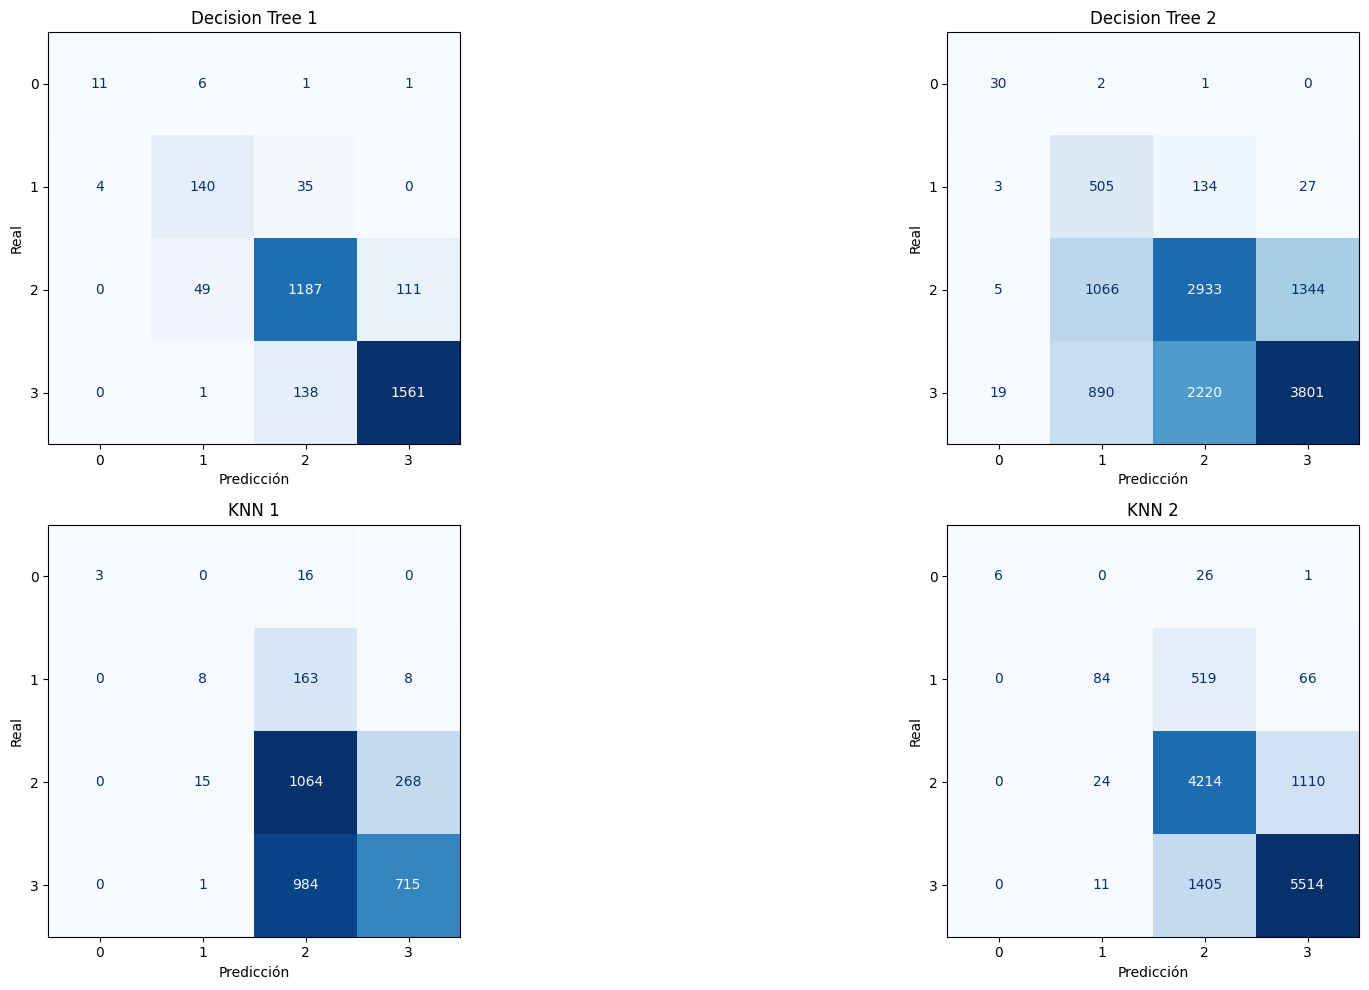

In [78]:
# Llamar la función para mostrar las matrices
plot_confusion_matrices(cm_list_test, model_names)

# Comparamos train vs test

# comparamos los results de train vs test

In [79]:
df_comparacion = df_results.merge(
  df_test,
  on="Modelo",
  suffixes=("_validacion", "_test")
)

In [80]:
df_comparacion

,Modelo,Accuracy_validacion,F1-Score_validacion,MAE_validacion,Accuracy_test,F1-Score_test,MAE_test
0,Decision Tree 1,0.910632,0.910649,0.089753,0.893374,0.893777,0.107858
1,Decision Tree 2,0.513482,0.538406,0.568952,0.560015,0.580927,0.514022
2,KNN 1,0.554700,0.535668,0.450693,0.551618,0.531492,0.456086
3,KNN 2,0.590139,0.579537,0.419106,0.756394,0.745673,0.251695


## Grafica de comparacion
* codigo generado por chat :D

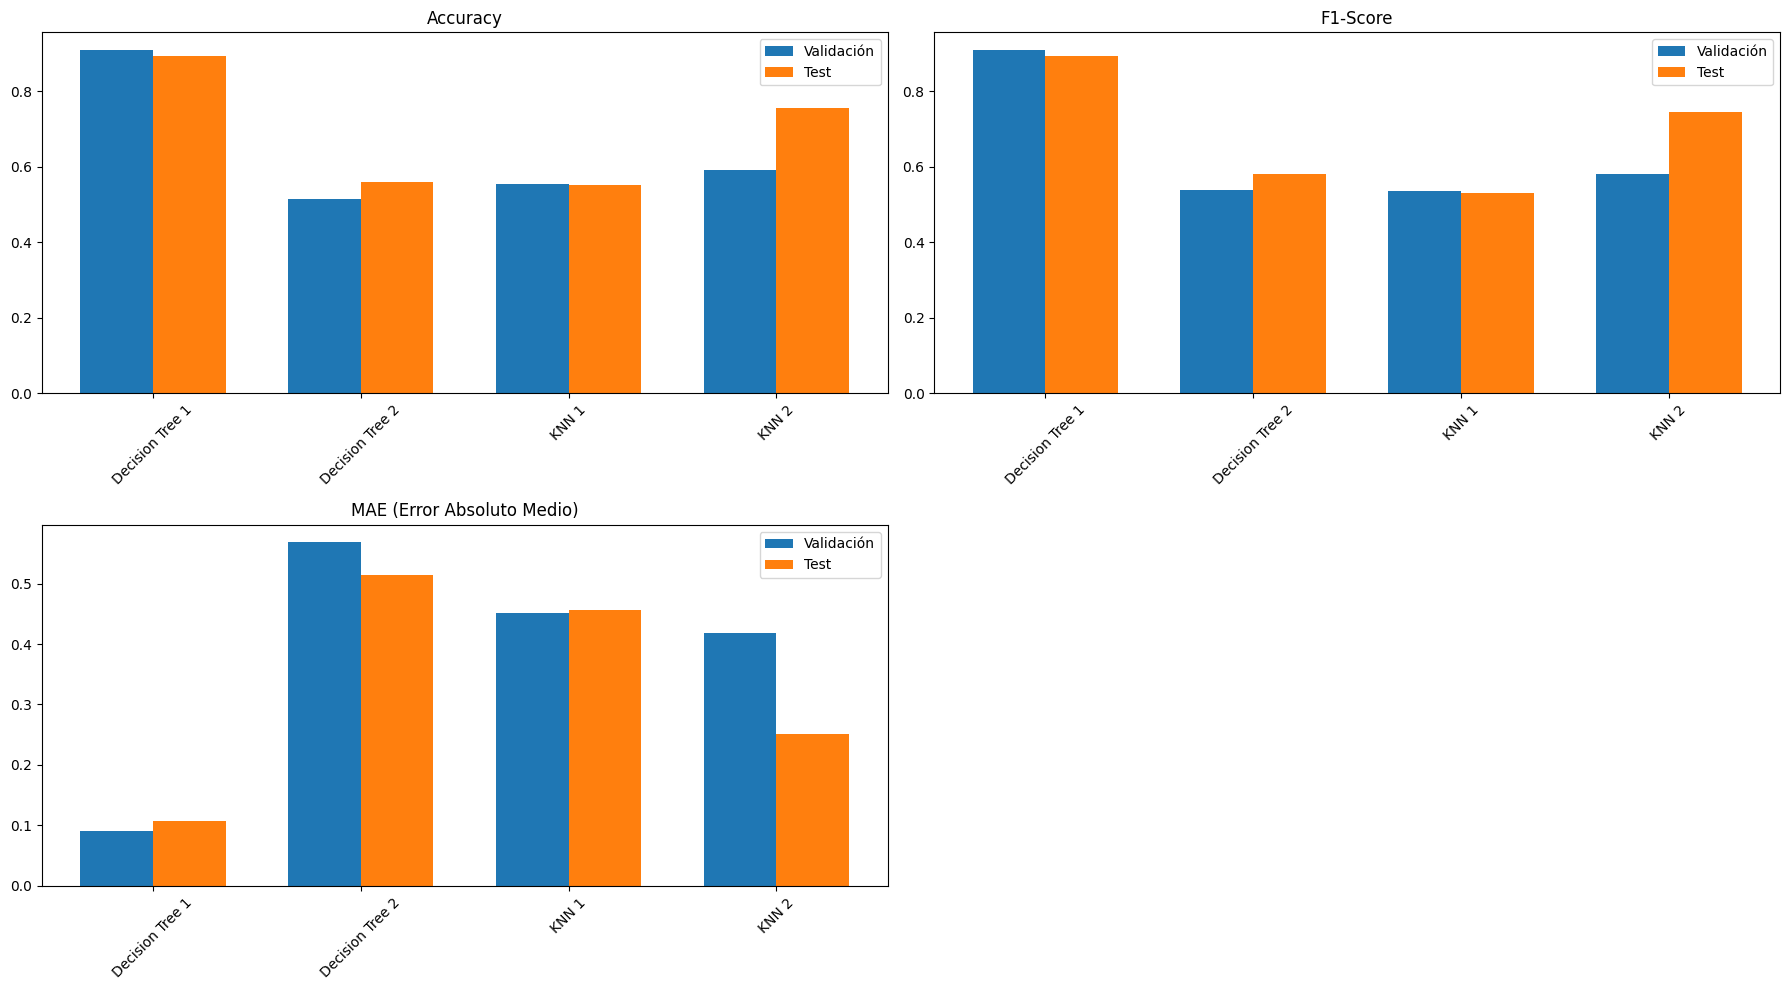

In [81]:
x = np.arange(len(df_comparacion["Modelo"]))
width = 0.35

fig, axes = plt.subplots(2, 2, figsize=(18, 10))
axes = axes.flatten()

# Accuracy
axes[0].bar(x - width/2, df_comparacion["Accuracy_validacion"], width, label="Validación")
axes[0].bar(x + width/2, df_comparacion["Accuracy_test"], width, label="Test")
axes[0].set_title("Accuracy")
axes[0].set_xticks(x)
axes[0].set_xticklabels(df_comparacion["Modelo"], rotation=45)
axes[0].legend()

# F1 Score
axes[1].bar(x - width/2, df_comparacion["F1-Score_validacion"], width, label="Validación")
axes[1].bar(x + width/2, df_comparacion["F1-Score_test"], width, label="Test")
axes[1].set_title("F1-Score")
axes[1].set_xticks(x)
axes[1].set_xticklabels(df_comparacion["Modelo"], rotation=45)
axes[1].legend()

# MAE
axes[2].bar(x - width/2, df_comparacion["MAE_validacion"], width, label="Validación")
axes[2].bar(x + width/2, df_comparacion["MAE_test"], width, label="Test")
axes[2].set_title("MAE (Error Absoluto Medio)")
axes[2].set_xticks(x)
axes[2].set_xticklabels(df_comparacion["Modelo"], rotation=45)
axes[2].legend()

# Ocultar el 4to subplot vacío
axes[3].axis('off')

plt.tight_layout()
plt.show()

# Conclusion:


X_test

In [82]:
y_pred_dt = modelo_arbol.predict(X_T)

In [83]:
y_pred_dt2 = modelo_arbol2.predict(X1_T)

In [84]:
y_pred_knn1 = modelo_knn.predict(X_T)

In [85]:
y_pred2_knn2 = modelo_knn2.predict(X1_T)

In [86]:
y_pred_dt = pd.DataFrame(y_pred_dt, columns=['y_pred_dt'])
y_pred_dt2 = pd.DataFrame(y_pred_dt2, columns=['y_pred_dt2'])
y_pred_knn1 = pd.DataFrame(y_pred_knn1, columns=['y_pred_knn1'])
y_pred2_knn2 = pd.DataFrame(y_pred2_knn2, columns=['y_pred2_knn2'])

In [87]:
print(y_pred_dt.shape)
print(y_pred_dt2.shape)
print(y_pred_knn1.shape)
print(y_pred2_knn2.shape)
print(X_T.shape)
print(X1_T.shape)

(3245, 1)
(12980, 1)
(3245, 1)
(12980, 1)
(3245, 8351)
(12980, 8346)


## Convertir de [0,1,2,3] a descripciopn

In [88]:
# Diccionario de mapeo
clase_a_descripcion = {
    0: 'Malo',
    1: 'Regular',
    2: 'Bueno',
    3: 'Excelente'
}

# resultados predichos:
preds1 = [
  y_pred_dt,
  y_pred_knn1
]

preds2 = [
  y_pred_dt2,
  y_pred2_knn2
]


# Nombres para las nuevas columnas
result_names1 = [
    'pred_dt', 'pred_knn1'
]

result_names2 = [
    'pred_dt2', 'pred2_knn2'
]

In [89]:
# Renombrar la única columna en cada DataFrame
for i, df in enumerate(preds1):
    preds1[i] = df.rename(columns={df.columns[0]: result_names1[i]})

# Combinar horizontalmente los DataFrames de predicciones
df_preds1 = pd.concat(preds1, axis=1)

# Agregar columnas descriptivas
for col in result_names1 + result_names1:
    df_preds1[f'{col}_desc'] = df_preds1[col].map(clase_a_descripcion)

In [90]:
df_preds1.sample(10)

,pred_dt,pred_knn1,pred_dt_desc,pred_knn1_desc
1465,2,2,Bueno,Bueno
1534,3,3,Excelente,Excelente
1903,3,2,Excelente,Bueno
2336,2,3,Bueno,Excelente
1925,3,3,Excelente,Excelente
692,2,2,Bueno,Bueno
1035,2,1,Bueno,Regular
970,3,2,Excelente,Bueno
2448,2,2,Bueno,Bueno
2341,2,1,Bueno,Regular


In [91]:
# Renombrar la única columna en cada DataFrame
for i, df in enumerate(preds2):
    preds2[i] = df.rename(columns={df.columns[0]: result_names2[i]})

In [92]:
# Combinar horizontalmente los DataFrames de predicciones
df_preds2 = pd.concat(preds2, axis=1)


In [93]:
# Agregar columnas descriptivas
for col in result_names2 + result_names2:
    df_preds2[f'{col}_desc'] = df_preds2[col].map(clase_a_descripcion)

In [94]:
df_preds2

,pred_dt2,pred2_knn2,pred_dt2_desc,pred2_knn2_desc
0,3,3,Excelente,Excelente
1,2,2,Bueno,Bueno
2,2,2,Bueno,Bueno
3,3,2,Excelente,Bueno
4,3,3,Excelente,Excelente
...,...,...,...,...
12975,1,2,Regular,Bueno
12976,3,2,Excelente,Bueno
12977,3,3,Excelente,Excelente
12978,3,3,Excelente,Excelente


In [95]:
# Unir con el DataFrame original `x`
df_combined1 = pd.concat([X_T.reset_index(drop=True), df_preds1.reset_index(drop=True)], axis=1)


In [96]:
df_combined2 = pd.concat([X1_T.reset_index(drop=True), df_preds2.reset_index(drop=True)], axis=1)

In [97]:
df_combined1.sample(10)

,num_pages,num_ratings,num_reviews,rating_5,rating_4,rating_3,rating_2,rating_1,12th Century,13th Century,...,نور عبدالمجيد,هبة سيد عبد العاطي,يحيى بن شرف النووي,يوسف زيدان,ปรีดี พนมยงค์,နုနုရည်အင်းဝ,pred_dt,pred_knn1,pred_dt_desc,pred_knn1_desc
879,0.027686,-0.204781,-0.273881,-0.182554,-0.213641,-0.220647,-0.200951,-0.138700,-0.012414,-0.012414,...,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778,3,2,Excelente,Bueno
2461,0.367897,-0.176544,-0.219257,-0.160540,-0.198917,-0.175807,-0.122519,-0.070043,-0.012414,-0.012414,...,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778,2,3,Bueno,Excelente
2035,0.083069,-0.267597,-0.323637,-0.229533,-0.289681,-0.297653,-0.257878,-0.183687,-0.012414,-0.012414,...,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778,2,2,Bueno,Bueno
312,0.443060,-0.250843,-0.287284,-0.216825,-0.273396,-0.277311,-0.227784,-0.156266,-0.012414,-0.012414,...,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778,2,2,Bueno,Bueno
1428,0.921730,-0.155387,-0.261173,-0.143115,-0.172953,-0.148747,-0.108670,-0.082789,-0.012414,-0.012414,...,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778,2,3,Bueno,Excelente
2037,-0.668561,-0.200848,-0.194600,-0.183851,-0.222513,-0.211220,-0.136767,-0.044657,-0.012414,-0.012414,...,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778,2,2,Bueno,Bueno
674,-0.712076,-0.264550,-0.317442,-0.226870,-0.285277,-0.295379,-0.257479,-0.184008,-0.012414,-0.012414,...,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778,3,2,Excelente,Bueno
2518,-0.486587,-0.239043,-0.255230,-0.207233,-0.253191,-0.267843,-0.233177,-0.170298,-0.012414,-0.012414,...,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778,3,2,Excelente,Bueno
2897,-0.636913,-0.266681,-0.313016,-0.227480,-0.289971,-0.299410,-0.258145,-0.174903,-0.012414,-0.012414,...,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778,2,2,Bueno,Bueno
1723,-0.142420,0.099359,0.200922,-0.000328,0.146378,0.227663,0.321111,0.138073,-0.012414,-0.012414,...,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778,2,1,Bueno,Regular


# Checarcon el texto

In [99]:
def recomendar_librosKNN(id_libro, df_numerico, df_text, n_recomendaciones=10):

  #  KNN
  knn = NearestNeighbors(
      metric='cosine',
      algorithm='auto')
  knn.fit(df_numerico)

  # Vector del libro base
  vector_libro = df_numerico.loc[[id_libro]]

  # Obtener vecinos (sumamos 1 porque el primer resultado será el libro mismo)
  distancias, indices = knn.kneighbors(vector_libro, n_neighbors=n_recomendaciones + 1)

  # Ignorar el primer resultado (es el propio libro)
  indices_recomendados = indices[0][1:]
  ids_recomendados = df_numerico.iloc[indices_recomendados].index

  # Combinar con texto y devolver
  recomendaciones = df_text.loc[ids_recomendados][['book_title', 'book_details']]
  return recomendaciones

## Correr KNN

In [ ]:
# Solicitar cuantos libros parecidos quieres:
#recomendaciones = int(input("¿Cuántos libros parecidos quieres?"))

# el libro es harry Potter 5
recomendar_librosKNN(138, df_combined1, text_test)# Mandar n numero de lbors)